# PCA ANALYSIS APPLIED TO THE PUMPKIN DATASET

In this case we are going to do a dimensional reduction of the pumpkin seed dataset (https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset) using the PCA algorithm (Principal Component Analysis).
Feature extraction is a very useful technique for representing a multidimensional data set and gaining insights into the decision bounds that an algorithm constructs. For this we can use the PCA algorithm and reduce the number of featureS.

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import f1_score

In [2]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [3]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

In [4]:
path = os.getcwd() + '\data\Pumpkin_Seeds_Dataset.xlsx'
df = pd.read_excel(path, header=0, names=None)
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [6]:
# We first divide the input variables (X) from the the label (y).
# We then transform y (which is a categorical value) into numerical values. 
X_df, y_df = remove_labels(df, 'Class')
y_df = y_df.factorize()[0]

In [7]:
# We reduce the dataset to 2 dimensions using PCA algorithm. 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_reduced = pca.fit_transform(X_df)

In [8]:
df_reduced = pd.DataFrame(df_reduced, columns=["c1", "c2"])

In [9]:
df_reduced.head(10)

,c1,c2
0,-34691.726278,-85.040696
1,-5838.174867,-122.076406
2,-12642.822000,181.001332
3,-20217.334127,-62.173569
4,-20465.296548,186.302969
5,-10611.583807,-13.697517
6,-10586.218184,-196.273312
7,-15579.618163,-14.012438
8,21490.970546,101.089401
9,-10333.337588,-123.294748


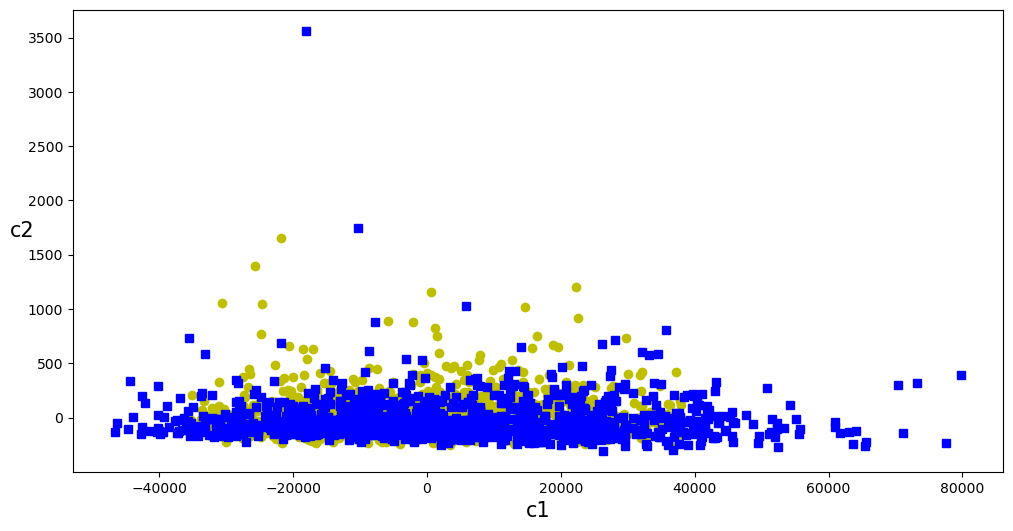

In [10]:
#If it's 2D, it's easier to represent it in a plot:

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
plt.plot(df_reduced["c1"][y_df==0], df_reduced["c2"][y_df==0], "yo", label="normal")
plt.plot(df_reduced["c1"][y_df==1], df_reduced["c2"][y_df==1], "bs", label="adware")
plt.plot(df_reduced["c1"][y_df==2], df_reduced["c2"][y_df==2], "g^", label="malware")
plt.xlabel("c1", fontsize=15)
plt.ylabel("c2", fontsize=15, rotation=0)
plt.show()

However, if our objective is not to visualize the data set, but to reduce the dimensionality of the original data set, instead of arbitrarily selecting the number of dimensions, sklearn provides us with a mechanism to select those dimensions that maintain a certain percentage of variance

In [11]:
# We reduce the dataset maintaining 99,9% of the variance 
from sklearn.decomposition import PCA

pca = PCA(n_components=0.999)
df_reduced = pca.fit_transform(X_df)

In [12]:
print("Number of components:", pca.n_components_)

Number of components: 1


In [13]:
# We transform it into a Pandas dataframe.
df_reduced = pd.DataFrame(df_reduced, columns=["c1"])
df_reduced["Class"] = y_df
df_reduced

,c1,Class
0,-34691.726278,0
1,-5838.174867,0
2,-12642.822000,0
3,-20217.334127,0
4,-20465.296548,0
...,...,...
2495,-1518.677063,1
2496,-15771.441586,1
2497,10273.985857,1
2498,-885.731677,1


Now we can split the data and apply the algorithm we consider in order to make the prediction.

In [14]:
train_set, val_set, test_set = train_val_test_split(df_reduced)

In [15]:
X_train, y_train = remove_labels(train_set, 'Class')
X_val, y_val = remove_labels(val_set, 'Class')
X_test, y_test = remove_labels(test_set, 'Class')

In [18]:
from sklearn.ensemble import RandomForestClassifier #We use RANDOM FOREST

clf_rnd = RandomForestClassifier(n_estimators=200, max_depth=80, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train, y_train)

RandomForestClassifier(max_depth=80, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [19]:
y_val_pred = clf_rnd.predict(X_val) #We predict with the validation set
print("F1 score validation test:", f1_score(y_val_pred, y_val, average='weighted'))

F1 score validation test: 0.5371209306238208


In [20]:
y_test_pred = clf_rnd.predict(X_test) #We predict with the test data
print("F1 score test set:", f1_score(y_test_pred, y_test, average='weighted'))

F1 score test set: 0.5573967642526965


We see that the F1 score in both cases is very low. We will try to improve this by selecting the proper hyperparameters of the random forest.

In [22]:
# We are going to use Grid Search to select the better model obtained with Random Forest
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [100, 500, 1000], 'max_leaf_nodes': [16, 24, 36], 'max_features': [0.5, 0.75, 1.0]},
    {'bootstrap': [False], 'n_estimators': [100, 500], 'max_features': [0.5, 0.75, 1.0]},
]


rnd_clf = RandomForestClassifier(n_jobs=-1, random_state=42)


grid_search = GridSearchCV(rnd_clf, param_grid, cv=5,
                           scoring='f1_weighted', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid=[{'max_features': [0.5, 0.75, 1.0],
                          'max_leaf_nodes': [16, 24, 36],
                          'n_estimators': [100, 500, 1000]},
                         {'bootstrap': [False],
                          'max_features': [0.5, 0.75, 1.0],
                          'n_estimators': [100, 500]}],
             return_train_score=True, scoring='f1_weighted')

In [23]:
grid_search.best_params_

{'max_features': 0.5, 'max_leaf_nodes': 36, 'n_estimators': 100}

In [24]:
grid_search.best_estimator_

RandomForestClassifier(max_features=0.5, max_leaf_nodes=36, n_jobs=-1,
                       random_state=42)

In [25]:
#Now we do it randomly
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#We decide a high range of parameters to try

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_depth': randint(low=8, high=50),
    }

rnd_clf = RandomForestClassifier(n_jobs=-1)


rnd_search = RandomizedSearchCV(rnd_clf, param_distributions=param_distribs,
                                n_iter=5, cv=2, scoring='f1_weighted')

rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000264C7325DC0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000264C73251C0>},
                   scoring='f1_weighted')

In [26]:
rnd_search.best_params_

{'max_depth': 36, 'n_estimators': 181}

In [27]:
rnd_search.best_estimator_

RandomForestClassifier(max_depth=36, n_estimators=181, n_jobs=-1)

In [28]:
# We select the best model
clf_rnd = rnd_search.best_estimator_

In [30]:
# We predict with the train set
y_train_pred = clf_rnd.predict(X_train)
print("F1 score Train Set:", f1_score(y_train_pred, y_train, average='weighted')) #A F1 OF 1.0 indicates overfitting

F1 score Train Set: 1.0


In [31]:
# We predict with the validation set
y_val_pred = clf_rnd.predict(X_val)
print("F1 score Validation Set:", f1_score(y_val_pred, y_val, average='weighted')) 

F1 score Validation Set: 0.5371209306238208


Definitely, there is overfitting because we see a small f1 in the validation set and a 100% f1 score in the train set. Changing the parameters didn't work and didn't improve our algorithm. After doing some research I found some things that could help to improve the performance:

-Check the class distribution: If the dataset is imbalanced, the classifier might be biased towards the majority class. You can use techniques such as oversampling, undersampling, or SMOTE to balance the class distribution.

-Try other classification algorithms: Random forest is a powerful algorithm, but it might not be the best fit for your dataset. You can try other algorithms such as logistic regression, support vector machines, or gradient boosting.

-Look for additional features: PCA is a dimensionality reduction technique that can reduce the number of features but might also discard some important information. You can try adding new features to the dataset to see if they improve the performance.

-Increase the number of components: PCA reduces the number of features while preserving the variance, but it might not capture all the information in the original dataset. You can try increasing the number of components to see if it improves the performance.

-Check for overfitting: If the model is overfitting the training data, it might not generalize well to new data. You can use techniques such as cross-validation or regularization to prevent overfitting.

By trying these methods, you may be able to improve the performance of the model and increase the F1 score.